In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('medical_examination.csv')

In [44]:
df.shape

(70000, 13)

In [45]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df = df.drop(columns=['id'])

In [6]:
df.head(2)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [8]:
# Age is in number of days
# height is in cm

In [9]:
# Task - 1

# Adding an overweight column
# Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing 
# their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight.
# Use the value 0 for NOT overweight and the value 1 for overweight.

In [46]:
# converting the height to meters
df['height'] = df['height'] * 0.01

In [11]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0
1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1
2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1
3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1
4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0


In [47]:
df['BMI'] = df['weight']/(df['height'])**2

In [13]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177


In [48]:
df['overweight'] = df['BMI'].apply(lambda x: 1 if x>25 else 0)

In [49]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [16]:
# Task - 2 

# Normalize data by making 0 always good and 
# 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, 
# set the value to 1.

In [17]:
df['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

In [18]:
df['gluc'].unique()

array([1, 2, 3], dtype=int64)

In [19]:
# There are 3 3 categories in both of them. We want that of the value is 1 then set the value to 0 and if it is greater 
#  then 1 set the value to 1 

# Means we are creating two categories

In [20]:
df['cholesterol'] = df['cholesterol'].map({1:0,2:1,3:1}) 

In [21]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,18393,2,1.68,62.0,110,80,0,1,0,0,1,0,21.967120,0
1,20228,1,1.56,85.0,140,90,1,1,0,0,1,1,34.927679,1
2,18857,1,1.65,64.0,130,70,1,1,0,0,0,1,23.507805,0
3,17623,2,1.69,82.0,150,100,0,1,0,0,1,1,28.710479,1
4,17474,1,1.56,56.0,100,60,0,1,0,0,0,0,23.011177,0


In [22]:
df['gluc'] = df['gluc'].map({1:0,2:1,3:1}) 

In [23]:
df.sample(5)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
22557,15361,1,1.70,65.0,120,80,0,0,0,0,1,0,22.491349,0
35368,22204,2,1.67,75.0,120,80,0,0,0,0,0,0,26.892323,1
40972,23278,1,1.64,69.0,140,80,1,1,0,0,0,1,25.654372,1
18734,20394,2,1.65,65.0,120,80,0,0,1,0,0,0,23.875115,0
35535,14620,1,1.56,68.0,140,80,1,0,0,0,0,1,27.942143,1


In [24]:
# Task - 3

# Plotting the categorical columns

In [25]:
catgories = ['cholesterol','gluc','smoke','alco','active','cardio','overweight','sex']

for i in catgories:
    df[i] = df[i].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          70000 non-null  int64   
 1   sex          70000 non-null  category
 2   height       70000 non-null  float64 
 3   weight       70000 non-null  float64 
 4   ap_hi        70000 non-null  int64   
 5   ap_lo        70000 non-null  int64   
 6   cholesterol  70000 non-null  category
 7   gluc         70000 non-null  category
 8   smoke        70000 non-null  category
 9   alco         70000 non-null  category
 10  active       70000 non-null  category
 11  cardio       70000 non-null  category
 12  BMI          70000 non-null  float64 
 13  overweight   70000 non-null  category
dtypes: category(8), float64(3), int64(3)
memory usage: 3.7 MB


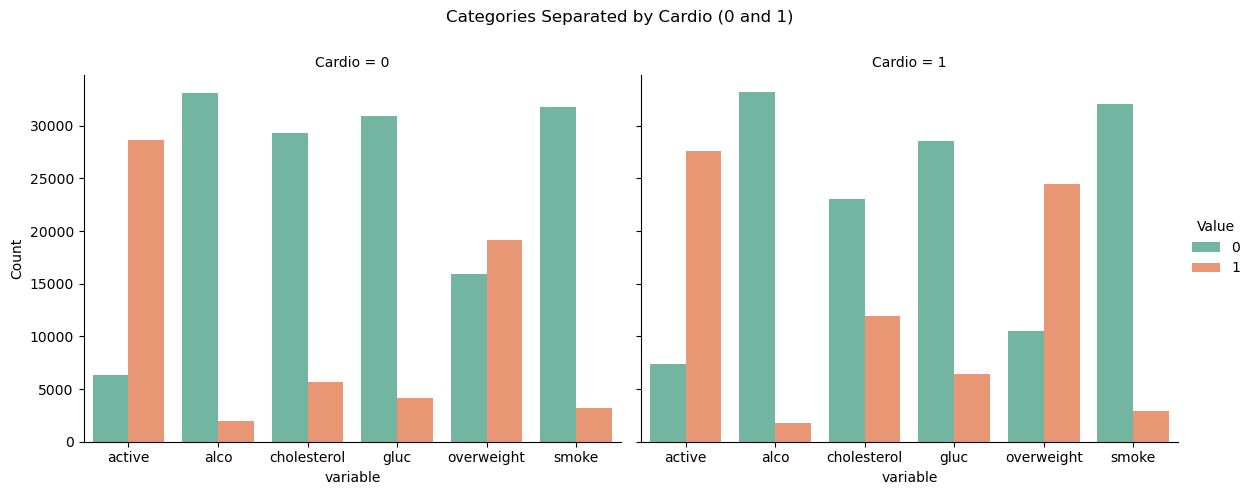

In [39]:
categories = ['active','alco','cholesterol', 'gluc','overweight','smoke']

# Melt the DataFrame to long format for easy plotting
df_melted = df.melt(id_vars=['cardio'], value_vars=categories, 
                    var_name='variable', value_name='Value')

# Create a catplot
g = sns.catplot(data=df_melted, x='variable', hue='Value', col='cardio',
                kind='count', height=5, aspect=1.2, palette='Set2')

# Set titles and adjust layout
g.set_titles('Cardio = {col_name}')
g.set_axis_labels('variable', 'total')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Categories Separated by Cardio (0 and 1)')

# Show the plot
plt.show()

In [28]:
new_df = df[df['ap_lo'] <= df['ap_hi']]

In [29]:
df['height'].quantile(0.025)

1.5

In [30]:
new_df = new_df[new_df['height']>=new_df['height'].quantile(0.025)]

In [31]:
new_df = new_df[new_df['height']<=new_df['height'].quantile(0.975)]

In [32]:
new_df = new_df[new_df['weight']>=new_df['weight'].quantile(0.025)]
new_df = new_df[new_df['weight']<=new_df['weight'].quantile(0.975)]

In [33]:
new_df.shape

(62784, 14)

In [50]:
df = df.drop(columns = ['BMI'])

In [53]:
corr = df.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.003457,0.003154,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,-0.000832
age,0.003457,1.000000,-0.022609,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.092118
sex,0.003154,-0.022609,1.000000,0.498221,0.155115,0.005985,0.015195,-0.035833,-0.020698,0.337664,0.170682,0.005991,0.007953,-0.040700
height,-0.003038,-0.081515,0.498221,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.115871
weight,-0.001830,0.053684,0.155115,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.616120
ap_hi,0.003356,0.020764,0.005985,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.021255
ap_lo,-0.002529,0.017647,0.015195,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.030235
cholesterol,0.006106,0.154424,-0.035833,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.131507
gluc,0.002467,0.098703,-0.020698,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.083699
smoke,-0.003699,-0.047633,0.337664,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.001314


In [35]:
mask = np.triu(np.ones_like(corr, dtype=bool))

In [ ]:
'id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'.

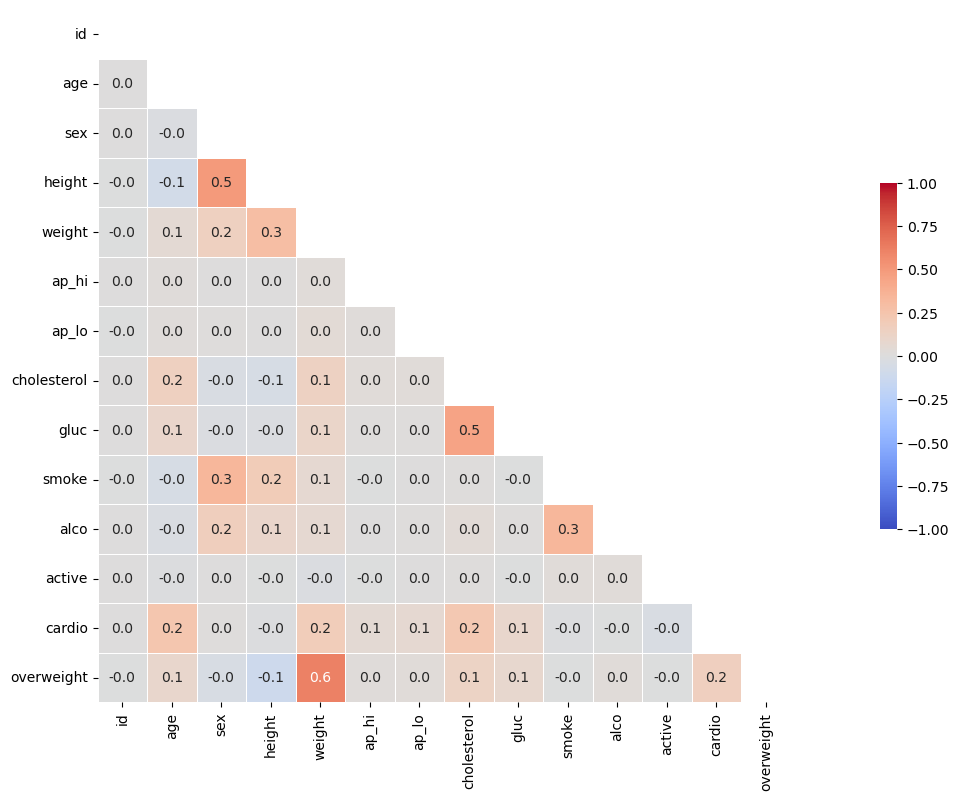

In [54]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(23, 9))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()